<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

In [3]:
!gdown 1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_ # downloading dataset

Downloading...
From: https://drive.google.com/uc?id=1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 21.3MB/s]


In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

<Axes: >

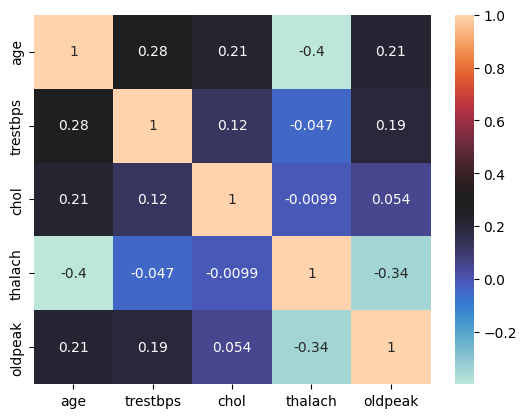

In [7]:
sns.heatmap(df[numerical_features].corr(), annot = True, cmap = 'icefire')

In [8]:
x, y = df.drop(columns = 'target'), df['target']

In [9]:
trainX , testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 1706)

In [10]:
# need to encode features because gradient descent is sensitive to big values which is used in backpropagation for NN's, and the problem of exploding gradients
scaler = MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [11]:
x.shape[1] # how many features it has for NN input

13

In [12]:
model = Sequential ([
    Input (shape = (x.shape[1], )),
    Dense(32, kernel_initializer="uniform", activation="relu"), # Dense means fully connected neurons between two layers, the first argument is the number of neurons in a layer
    Dense(16, kernel_initializer="uniform", activation="relu"), # kernel_initializer will initialize the weights in the beginning of the training
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="sigmoid")
])

In [13]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [14]:
history = model.fit(trainX, trainY, validation_split=0.1, epochs=32, batch_size=16)

Epoch 1/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.5146 - loss: 0.6932 - val_accuracy: 0.4400 - val_loss: 0.6933
Epoch 2/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5011 - loss: 0.6931 - val_accuracy: 0.5600 - val_loss: 0.6928
Epoch 3/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5297 - loss: 0.6928 - val_accuracy: 0.6400 - val_loss: 0.6921
Epoch 4/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.6914 - val_accuracy: 0.7200 - val_loss: 0.6899
Epoch 5/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8284 - loss: 0.6869 - val_accuracy: 0.7200 - val_loss: 0.6837
Epoch 6/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.6763 - val_accuracy: 0.7200 - val_loss: 0.6696
Epoch 7/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.6527 - val_accuracy: 0.6800 - val_loss: 0.6444
Epoch 8/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8200 - loss: 0.6081 - val_accuracy: 0.6400 - val_los

In [15]:
model.history

<Axes: >

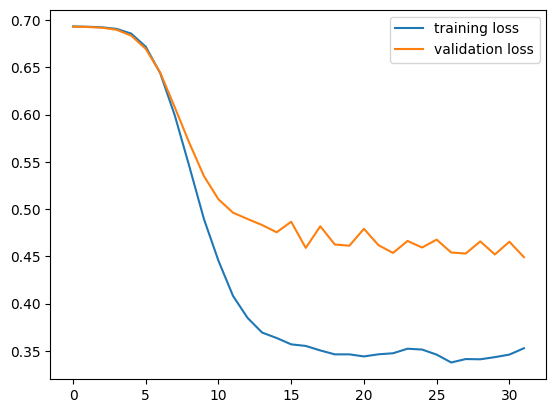

In [16]:
sns.lineplot(history.history['loss'], label = 'training loss')
sns.lineplot(history.history['val_loss'], label = 'validation loss')

In [17]:
predictions = model.predict(testX).round()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step


In [18]:
print(classification_report (predictions, testY))

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.75        24
         1.0       0.85      0.78      0.82        37

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



# Now lets compare the difference between a NN and XGB classifier

In [19]:
classifier = XGBClassifier(n_estimators = 50, learning_rate = 0.01)

In [20]:
classifier.fit(trainX, trainY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
p = classifier.predict(testX)

In [24]:
print(classification_report(p, testY))

              precision    recall  f1-score   support

           0       0.52      0.78      0.62        18
           1       0.88      0.70      0.78        43

    accuracy                           0.72        61
   macro avg       0.70      0.74      0.70        61
weighted avg       0.77      0.72      0.73        61



# NEURAL NETWORKS AND REGRESSION

In [26]:
!gdown 11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H

Downloading...
From: https://drive.google.com/uc?id=11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H
To: /content/Admission_Predict.csv
100% 12.9k/12.9k [00:00<00:00, 31.2MB/s]


In [38]:
df2 = pd.read_csv('Admission_Predict.csv')

In [62]:
x2, y2 = df2.drop(columns = 'Chance of Admit '), df2['Chance of Admit ']

In [63]:
trainX_2 , testX_2, trainY_2, testY_2 = train_test_split(x2, y2, test_size = 0.2, random_state = 1706)

In [64]:
trainX_2 = scaler.fit_transform(trainX_2)
testX_2 = scaler.transform(testX_2)

In [65]:
linear_nn = Sequential([
    Input(shape=(x.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="linear"),
])

In [66]:
linear_nn.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [ ]:
history = linear_nn.fit(trainX_2, trainY_2, validation_split=0.1, epochs=32, batch_size=16)

In [71]:
print(r2_score(testY, linear_nn.predict(testX)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
-276539.19797516195


<Axes: >

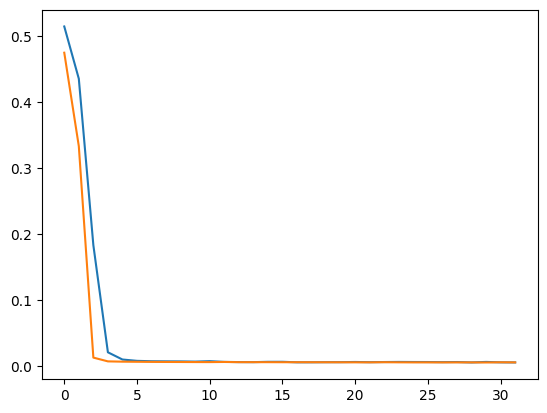

In [70]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])